<a href="https://colab.research.google.com/github/christofw/chord_eval/blob/main/analyze_CASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jams
!pip install libfmp
!pip install wget
import numpy as np, os, scipy
import pandas as pd
from matplotlib import pyplot as plt
import librosa
import libfmp
import jams
import mir_eval
import urllib.request as urll
import wget
from sortedcontainers import SortedKeyList

     |████████████████████████████████| 51 kB 60 kB/s 
     |████████████████████████████████| 90 kB 6.9 MB/s 
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64922 sha256=ccc84c7731ed8caa9ba49077f6ba530e12ab34f2e9092cda77e12d78b4e5f75c
  Stored in directory: /root/.cache/pip/wheels/c9/aa/16/ce72bc4caa58dfab819e3f46b3542f2bf90a83009f4ea07a48
  Created wheel for mir-eval: filename=mir_eval-0.7-py3-none-any.whl size=100721 sha256=ef8af756c6d852372629b99c66d895c3f083adbc3e1922120d8728b563c50923
  Stored in directory: /root/.cache/pip/wheels/18/5a/46/d2527ff1fd975e1a793375e6ed763bfe4d3ea396b7cdc470eb
Successfully built jams mir-eval
     |████████████████████████████████| 110 kB 7.5 MB/s 
     |████████████████████████████████| 793 kB 43.6 MB/s 
     |████████████████████████████████| 5.6 MB 43.0 MB/s 
     |████████████████████████████████| 18.5 MB 726 kB/s 
     |████████████████████████████████| 381 kB 43.5 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=bb81d12fd28cad9aa3eb668a4069dd411ed2a7b76ec472ee683dae157f1e8af3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Load Chordify Annotator Subjectivity Dataset
... and corresponding functions

In [2]:
!git clone https://github.com/chordify/CASD.git

# create chroma from chord label
def labchroma(l):
    r,c,b = mir_eval.chord.encode(l)
    return np.roll(c,r)

# plot the chromas of the annotators of song s
def plotchroma(filename):
    jam = jams.load(filename)

    nannotations = len(jam['annotations'])
    f, axarr = plt.subplots(nannotations, sharex=False, sharey=True, figsize=(10, 5))
    for (ann, ax) in zip(jam['annotations'],axarr):
        chroma = np.array([labchroma(lab.value) for lab in ann.data])
        im = ax.matshow(chroma.T, aspect='auto', cmap=plt.cm.Blues)
        ax.set_ylabel(ann.annotation_metadata.annotator.id)
        ax.get_yaxis().set_ticks([])
    f.tight_layout()
    
filename = os.path.join('CASD', 'jams', '1012.jams')
jam = jams.load(filename)
ann1 = jam['annotations'][0]['data']

# plotchroma(filename)
df_ann1 = jam['annotations'][0].to_dataframe()
df_val = df_ann1['value']
df_ann_seq = pd.DataFrame(df_val.loc[df_val.shift() != df_val])

all_shorthands = []
for row in df_ann_seq.itertuples():
    # print(row.value)
    root, shorthand, scaledeg, bass = mir_eval.chord.split(row.value)
    if (not root=='N'):
        if ((not shorthand) or (shorthand=='')):
            assert False, 'Error - shorthand label is empty!'
        all_shorthands.append(shorthand)


Cloning into 'CASD'...
remote: Enumerating objects: 94, done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 94
Unpacking objects: 100% (94/94), done.


In [3]:
print(all_shorthands)

['maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'min7', 'maj', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'min7', 'maj', 'maj', 'maj', 'maj', 'min7', 'maj', 'min7', 'maj', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'maj', 'maj', 'min7', 'maj', 'min7', 'maj', 'maj', 'maj', 'maj', 'min7', 'maj'

In [4]:
def get_shorthand(label):
    root, shorthand, scaledeg, bass = mir_eval.chord.split(label)
    return shorthand

df_ann_seq
# df_shorthand = df_ann_seq.apply(lambda row: get_shorthand(row['value']))


,value
0,N
5,G:maj
7,E:min7
9,D:maj
11,C:maj
...,...
607,F#:min7
609,E:maj
611,D:maj
613,A:maj


In [5]:
df_ann_all = jam['annotations'][0].to_dataframe().drop(['confidence'], axis=1)
df_ann_all = df_ann_all.rename(columns={'value': 'annot'+str(1)})

for ann_num in range(1, 4):
    df_curr_ann = jam['annotations'][ann_num].to_dataframe().drop(['confidence'], axis=1)
    df_curr_ann = df_curr_ann.rename(columns={'value': 'annot'+str(1+ann_num)})
    df_ann_all=pd.merge(left=df_ann_all, right=df_curr_ann, how='left', left_on=['time', 'duration'], right_on=['time', 'duration'])
df_ann_all

,time,duration,annot1,annot2,annot3,annot4
0,0.000000,0.510839,N,N,N,N
1,0.510839,0.267030,N,N,N,N
2,0.777869,0.441179,N,N,N,N
3,1.219048,0.464399,N,N,N,N
4,1.683447,0.487619,N,N,N,N
...,...,...,...,...,...,...
612,289.332240,0.464390,D:maj,D:maj,D:sus2,D:maj
613,289.796630,0.464420,A:maj,A:maj,A:maj,D:maj
614,290.261050,0.464380,A:maj,A:maj,A:maj,D:maj
615,290.725430,0.464420,F#:min7,F#:min,F#:min7,D:maj


### Load annotations for alle files

In [6]:
def merge_annotators(jamsobject):
    df_ann_all = jamsobject['annotations'][0].to_dataframe().drop(['confidence'], axis=1)
    df_ann_all = df_ann_all.rename(columns={'value': 'annot'+str(1)})

    for ann_num in range(1, 4):
        df_curr_ann = jamsobject['annotations'][ann_num].to_dataframe().drop(['confidence'], axis=1)
        df_curr_ann = df_curr_ann.rename(columns={'value': 'annot'+str(1+ann_num)})
        df_ann_all=pd.merge(left=df_ann_all, right=df_curr_ann, how='left', left_on=['time', 'duration'], right_on=['time', 'duration'])
    return df_ann_all

jams_dir = os.path.join('CASD', 'jams')
df_all_songs = pd.DataFrame({'time' : [], 'duration' : [], 'annot1' : [], 'annot2' : [], 'annot3' : [], 'annot4' : []})

for root, dirs, files in os.walk(jams_dir):
    for filename in files:
        path_file = os.path.join(jams_dir, filename)
        jamsobject = jams.load(path_file)
        curr_df = merge_annotators(jamsobject)
        df_all_songs = pd.concat([df_all_songs, curr_df], ignore_index=True)
        print(' ... ' + filename + ' added.')

 ... 1012.jams added.
 ... 1239.jams added.
 ... 1282.jams added.
 ... 159.jams added.
 ... 769.jams added.
 ... 382.jams added.
 ... 1235.jams added.
 ... 1218.jams added.
 ... 92.jams added.
 ... 765.jams added.
 ... 99.jams added.
 ... 332.jams added.
 ... 591.jams added.
 ... 995.jams added.
 ... 147.jams added.
 ... 1114.jams added.
 ... 709.jams added.
 ... 736.jams added.
 ... 723.jams added.
 ... 78.jams added.
 ... 114.jams added.
 ... 209.jams added.
 ... 770.jams added.
 ... 1212.jams added.
 ... 236.jams added.
 ... 12.jams added.
 ... 969.jams added.
 ... 783.jams added.
 ... 1225.jams added.
 ... 170.jams added.
 ... 886.jams added.
 ... 444.jams added.
 ... 958.jams added.
 ... 987.jams added.
 ... 377.jams added.
 ... 978.jams added.
 ... 329.jams added.
 ... 74.jams added.
 ... 812.jams added.
 ... 849.jams added.
 ... 414.jams added.
 ... 481.jams added.
 ... 503.jams added.
 ... 517.jams added.
 ... 322.jams added.
 ... 43.jams added.
 ... 430.jams added.
 ... 905.ja

In [7]:
# Print all labels where anotators disagree in the root

df_all_songs

previousstring = ''
counter = 0
for index, row in df_all_songs.iterrows():
    root1, shorthand1, scaledeg1, bass1 = mir_eval.chord.split(row['annot1'])
    root2, shorthand2, scaledeg2, bass2 = mir_eval.chord.split(row['annot2'])
    root3, shorthand3, scaledeg3, bass3 = mir_eval.chord.split(row['annot3'])
    root4, shorthand4, scaledeg4, bass4 = mir_eval.chord.split(row['annot4'])
    rootlist = [root1, root2, root3, root4]
    if any([a!=b for i,a in enumerate(rootlist) for j,b in enumerate(rootlist) if i != j]):
        counter+=1
        comparestring = root1+':'+shorthand1+' - '+root2+':'+shorthand2+' - '+root3+':'+shorthand3+' - '+root4+':'+shorthand4
        if not comparestring==previousstring:
            print(comparestring)
        previousstring = comparestring

E:min7 - E:min - D:maj - E:min9
D:maj - D:maj - G:maj - D:sus4
C:maj - C:maj - C:maj9 - G:maj
E:min7 - E:min - D:maj - E:min9
D:maj - D:maj - G:maj - D:sus4
C:maj - C:maj - C:maj9 - G:maj
E:min7 - E:min - D:maj - E:min9
D:maj - D:maj - G:maj - D:sus4
C:maj - C:maj - C:maj9 - G:maj
G:maj - G:maj - G:maj - C:maj
E:min7 - E:min - E:min7 - C:maj
D:maj - D:maj - D:maj - C:maj
G:maj - G:maj - G:maj - C:9
E:min7 - E:min - E:min7 - C:9
D:maj - D:maj - D:maj - C:9
C:maj - C:maj - C:sus2 - E:min
G:maj - G:maj - G:maj - C:9
G:maj - G:maj - G:sus4 - C:9
E:min7 - E:min - E:min7 - C:9
D:maj - D:maj - D:maj - E:min
C:maj - C:maj - C:sus2 - E:min
C:maj - C:maj - C:sus2 - D:sus4
C:maj - C:maj - C:sus2 - G:maj
G:maj - G:maj - G:maj - E:min
E:min7 - E:min - E:min7 - D:sus4
D:maj - D:maj - D:maj - E:min
D:maj - C:maj - D:maj - E:min
C:maj - C:maj - C:maj - A:7
D:maj - D:maj - D:maj - C:maj
D:maj - D:sus4 - D:sus4 - C:maj
D:maj - D:maj - D:maj - C:maj
C:maj - C:maj - C:sus2 - E:min
G:maj - G:maj - G:maj - 

In [15]:
# Print all labels where at least two annotators disagree in the root (ignoring 'N')

previousstring = ''
counter = 0
all_stats = np.zeros((0, 4))   # statistics: cs_mean, cs_std, idm_mean, idm_std

for index, row in df_all_songs.iterrows():
    label1 = row['annot1']
    label2 = row['annot2']
    label3 = row['annot3']
    label4 = row['annot4']
    root1, shorthand1, scaledeg1, bass1 = mir_eval.chord.split(label1)
    root2, shorthand2, scaledeg2, bass2 = mir_eval.chord.split(label2)
    root3, shorthand3, scaledeg3, bass3 = mir_eval.chord.split(label3)
    root4, shorthand4, scaledeg4, bass4 = mir_eval.chord.split(label4)
    rootlist = [root1, root2, root3, root4]
    rootlist_clean = rootlist

    while 'N' in rootlist_clean: rootlist_clean.remove('N')

    rootlist_clean = [mir_eval.chord.pitch_class_to_semitone(r) for r in rootlist_clean]

    if any([a!=b for i,a in enumerate(rootlist_clean) for j,b in enumerate(rootlist_clean) if i != j]):
        counter+=1
        comparestring = root1+':'+shorthand1+' - '+root2+':'+shorthand2+' - '+root3+':'+shorthand3+' - '+root4+':'+shorthand4

        rootnum1, bitmap1, bassnum1 = mir_eval.chord.encode(label1, reduce_extended_chords=False, strict_bass_intervals=False)
        absolute_pcs1 = mir_eval.chord.rotate_bitmap_to_root(bitmap1, rootnum1)
        rootnum2, bitmap2, bassnum2 = mir_eval.chord.encode(label2, reduce_extended_chords=False, strict_bass_intervals=False)
        absolute_pcs2 = mir_eval.chord.rotate_bitmap_to_root(bitmap2, rootnum2)
        rootnum3, bitmap3, bassnum3 = mir_eval.chord.encode(label3, reduce_extended_chords=False, strict_bass_intervals=False)
        absolute_pcs3 = mir_eval.chord.rotate_bitmap_to_root(bitmap3, rootnum3)
        rootnum4, bitmap4, bassnum4 = mir_eval.chord.encode(label4, reduce_extended_chords=False, strict_bass_intervals=False)
        absolute_pcs4 = mir_eval.chord.rotate_bitmap_to_root(bitmap4, rootnum4)

        cs12 = cossim(np.expand_dims(absolute_pcs1, axis=-1), np.expand_dims(absolute_pcs2, axis=-1))
        cs13 = cossim(np.expand_dims(absolute_pcs1, axis=-1), np.expand_dims(absolute_pcs3, axis=-1))
        cs14 = cossim(np.expand_dims(absolute_pcs1, axis=-1), np.expand_dims(absolute_pcs4, axis=-1))
        cs23 = cossim(np.expand_dims(absolute_pcs2, axis=-1), np.expand_dims(absolute_pcs3, axis=-1))
        cs24 = cossim(np.expand_dims(absolute_pcs2, axis=-1), np.expand_dims(absolute_pcs4, axis=-1))
        cs34 = cossim(np.expand_dims(absolute_pcs3, axis=-1), np.expand_dims(absolute_pcs4, axis=-1))
        mean_cs = np.mean([cs12, cs13, cs14, cs23, cs24, cs34])
        std_cs = np.std([cs12, cs13, cs14, cs23, cs24, cs34])

        # insertion-deletion measure (Johanna)
        idm12 = predictionsInsertionsSymmetric(absolute_pcs1, absolute_pcs2)
        idm13 = predictionsInsertionsSymmetric(absolute_pcs1, absolute_pcs3)
        idm14 = predictionsInsertionsSymmetric(absolute_pcs1, absolute_pcs4)
        idm23 = predictionsInsertionsSymmetric(absolute_pcs2, absolute_pcs3)
        idm24 = predictionsInsertionsSymmetric(absolute_pcs2, absolute_pcs4)
        idm34 = predictionsInsertionsSymmetric(absolute_pcs3, absolute_pcs4)
        mean_idm = np.mean([idm12, idm13, idm14, idm23, idm24, idm34])
        std_idm = np.std([idm12, idm13, idm14, idm23, idm24, idm34])

        if not comparestring==previousstring:
            print('{:<38}'.format(comparestring) + '   |  CS: ' + '{:.3f}'.format(mean_cs) + u" \u00B1 " + '{:.3f}'.format(std_cs) + '  | IDM: ' + '{:.3f}'.format(mean_idm) + u" \u00B1 " + '{:.3f}'.format(std_idm))
       
        curr_stats = np.array([[mean_cs, std_cs, mean_idm, std_idm]])
        all_stats = np.concatenate((all_stats, curr_stats), axis=0)

        previousstring = comparestring



E:min7 - E:min - D:maj - E:min9          |  CS: 0.552 ± 0.374  | IDM: 0.500 ± 0.354
D:maj - D:maj - G:maj - D:sus4           |  CS: 0.611 ± 0.229  | IDM: 0.611 ± 0.229
C:maj - C:maj - C:maj9 - G:maj           |  CS: 0.663 ± 0.265  | IDM: 0.611 ± 0.244
E:min7 - E:min - D:maj - E:min9          |  CS: 0.552 ± 0.374  | IDM: 0.500 ± 0.354
D:maj - D:maj - G:maj - D:sus4           |  CS: 0.611 ± 0.229  | IDM: 0.611 ± 0.229
C:maj - C:maj - C:maj9 - G:maj           |  CS: 0.663 ± 0.265  | IDM: 0.611 ± 0.244
E:min7 - E:min - D:maj - E:min9          |  CS: 0.552 ± 0.374  | IDM: 0.500 ± 0.354
D:maj - D:maj - G:maj - D:sus4           |  CS: 0.611 ± 0.229  | IDM: 0.611 ± 0.229
C:maj - C:maj - C:maj9 - G:maj           |  CS: 0.663 ± 0.265  | IDM: 0.611 ± 0.244
G:maj - G:maj - G:maj - C:maj            |  CS: 0.667 ± 0.333  | IDM: 0.667 ± 0.333
E:min7 - E:min - E:min7 - C:maj          |  CS: 0.759 ± 0.161  | IDM: 0.694 ± 0.171
D:maj - D:maj - D:maj - C:maj            |  CS: 0.500 ± 0.500  | IDM: 0.500 

In [16]:
print('At least two different roots for ' + str(counter) + ' chord labels out of ' + str(len(df_all_songs)) + ' in total, equalling ' + '{:.2f}'.format(100*counter/len(df_all_songs)) + ' percent.')

print('Mean cosine similarity of these chords: ' + '{:.4f}'.format(np.mean(all_stats[:, 0])) + u" \u00B1 " + '{:.4f}'.format(np.std(all_stats[:, 0])))
print('Mean insertion-deletion-measure (symm.): ' + '{:.4f}'.format(np.mean(all_stats[:, 2])) + u" \u00B1 " + '{:.4f}'.format(np.std(all_stats[:, 2])))

At least two different roots for 9445 chord labels out of 24008 in total, equalling 39.34 percent.
Mean cosine similarity of these chords: 0.6131 ± 0.1471
Mean insertion-deletion-measure (symm.): 0.5654 ± 0.1716


Pairwise analysis

In [19]:
# Print all pairs of annotations that disagree in the root (ignoring 'N')

from itertools import combinations

previousstring = ''
counter = 0
allpairs = 0
pairwise_stats = np.zeros((0, 5))   # statistics: #pcs1, #pcs2, #pcsshared, cs, idm

for index, row in df_all_songs.iterrows():

    for (i, j) in combinations([1, 2, 3, 4], 2):
        allpairs += 1        
        exec("label1 = row['annot" + str(i) + "']")
        exec("label2 = row['annot" + str(j) + "']")
        root1, shorthand1, scaledeg1, bass1 = mir_eval.chord.split(label1)
        root2, shorthand2, scaledeg2, bass2 = mir_eval.chord.split(label2)

        rootlist_clean = [root1, root2]
        while 'N' in rootlist_clean: rootlist_clean.remove('N')
        rootlist_clean = [mir_eval.chord.pitch_class_to_semitone(r) for r in rootlist_clean]

        if (len(rootlist_clean)>1):
            if (rootlist_clean[0]!=rootlist_clean[1]):
                counter+=1
                comparestring = root1+':'+shorthand1+' - '+root2+':'+shorthand2

                rootnum1, bitmap1, bassnum1 = mir_eval.chord.encode(label1, reduce_extended_chords=False, strict_bass_intervals=False)
                absolute_pcs1 = mir_eval.chord.rotate_bitmap_to_root(bitmap1, rootnum1)
                rootnum2, bitmap2, bassnum2 = mir_eval.chord.encode(label2, reduce_extended_chords=False, strict_bass_intervals=False)
                absolute_pcs2 = mir_eval.chord.rotate_bitmap_to_root(bitmap2, rootnum2)

                # cosine similarity measure
                cs12 = cossim(np.expand_dims(absolute_pcs1, axis=-1), np.expand_dims(absolute_pcs2, axis=-1))

                # insertion-deletion measure (Johanna)
                idm12 = predictionsInsertionsSymmetric(absolute_pcs1, absolute_pcs2)

                # if cs12>0.95:
                print('{:<20}'.format(comparestring) + '   |  CS: ' + '{:.3f}'.format(cs12) + '  | IDM: ' + '{:.3f}'.format(idm12))

                pclist1 = set(absolute_pcs1.nonzero()[0])
                pclist2 = set(absolute_pcs2.nonzero()[0])
                pclistjoint = pclist1.intersection(pclist2)

                num_pcs1 = len(pclist1)
                num_pcs2 = len(pclist2)
                num_pcs_shared = len(pclistjoint)
                curr_stats = np.array([[num_pcs1, num_pcs2, num_pcs_shared, cs12, idm12]])
                pairwise_stats = np.concatenate((pairwise_stats, curr_stats), axis=0)

                previousstring = comparestring

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
C:maj - F:7            |  CS: 0.289  | IDM: 0.250
F:7 - C:maj            |  CS: 0.289  | IDM: 0.250
C:7 - F:7              |  CS: 0.250  | IDM: 0.250
C:maj - F:7            |  CS: 0.289  | IDM: 0.250
F:7 - C:maj            |  CS: 0.289  | IDM: 0.250
C:7 - F:7              |  CS: 0.250  | IDM: 0.250
C:maj - F:7            |  CS: 0.289  | IDM: 0.250
F:7 - C:maj            |  CS: 0.289  | IDM: 0.250
C:7 - F:7              |  CS: 0.250  | IDM: 0.250
C:maj - F:7            |  CS: 0.289  | IDM: 0.250
F:7 - C:maj            |  CS: 0.289  | IDM: 0.250
C:7 - F:7              |  CS: 0.250  | IDM: 0.250
C:maj - F:7            |  CS: 0.289  | IDM: 0.250
F:7 - C:maj            |  CS: 0.289  | IDM: 0.250
C:7 - F:7              |  CS: 0.250  | IDM: 0.250
C:maj - F:7            |  CS: 0.289  | IDM: 0.250
F:7 - C:maj            |  CS: 0.289  | IDM: 0.250
C:7 - F:7              |  CS: 0.250  | IDM: 0.250
C:maj - F:7            |  CS: 0.2

### Statistical analysis of pairwise measures

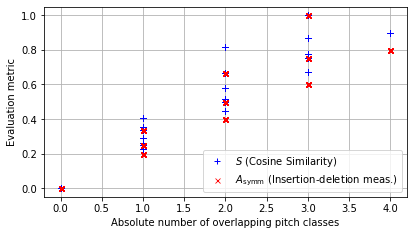

In [20]:
# print(pairwise_stats.shape)
# print(pairwise_stats)

plt.figure(figsize=(6.5,3.5))
plt.plot(pairwise_stats[:, 2], pairwise_stats[:, 3], 'b+', markeredgewidth=1)
plt.plot(pairwise_stats[:, 2], pairwise_stats[:, 4], 'rx', markersize=5, markeredgewidth=.8)
# plt.plot(pairwise_stats[:, 2], pairwise_stats[:, 2]/(0.5*(pairwise_stats[:, 0]+pairwise_stats[:, 1])),  'g*', linewidth=0.5)
plt.legend([r'$S$ (Cosine Similarity)', r'$A_\mathrm{symm}$ (Insertion-deletion meas.)'], loc=4)
plt.grid()
ax = plt.gca()
ax.set_xlabel('Absolute number of overlapping pitch classes')
ax.set_ylabel('Evaluation metric')
plt.show
plt.tight_layout
plt.savefig('metrics_absolute_no_pcs.pdf')

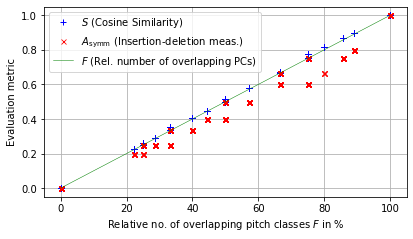

In [21]:
# print(pairwise_stats.shape)
# print(pairwise_stats)

plt.figure(figsize=(6.5,3.5))
plt.plot(100*pairwise_stats[:, 2]/(0.5*(pairwise_stats[:, 0]+pairwise_stats[:, 1])), pairwise_stats[:, 3], 'b+', markeredgewidth=1)
plt.plot(100*pairwise_stats[:, 2]/(0.5*(pairwise_stats[:, 0]+pairwise_stats[:, 1])), pairwise_stats[:, 4], 'rx', markersize=5, markeredgewidth=.8)
plt.plot([0, 100], [0, 1],  'g-', linewidth=0.5)
plt.legend([r'$S$ (Cosine Similarity)', r'$A_\mathrm{symm}$ (Insertion-deletion meas.)', '$F$ (Rel. number of overlapping PCs)'], loc=0)
plt.grid()
ax = plt.gca()
ax.set_xlabel(r'Relative no. of overlapping pitch classes $F$ in %')
ax.set_ylabel('Evaluation metric')
plt.show
plt.tight_layout
plt.savefig('metrics_relative_no_pcs.pdf')

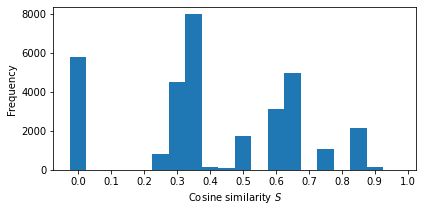

In [22]:
plt.figure(figsize=(6.5,3))
plt.hist(pairwise_stats[:, 3], np.arange(-0.025, 1.025, 0.05))
# plt.grid()
ax = plt.gca()
ax.set_xlabel(r'Cosine similarity $S$')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(0, 1.1, 0.1))
plt.show
plt.tight_layout
plt.savefig('casd_cossim_histo.pdf')

# Metrics

In [9]:
from libfmp.c3 import normalize_feature_sequence

def cossim(vec1, vec2, threshold=0.001):
    vec1_norm = normalize_feature_sequence(vec1, norm='2', threshold=threshold)
    vec2_norm = normalize_feature_sequence(vec2, norm='2', threshold=threshold)
    cosine_sim = np.sum(np.multiply(vec1_norm, vec2_norm))/vec2_norm.shape[1]
    return cosine_sim

In [10]:
# calculates chord metric on aboslute PC bitmap
# assumes numpy array as input
def predictionsInsertionsBM(estimateBM, referenceBM):

    estimate=set(estimateBM.nonzero()[0])
    reference=set(referenceBM.nonzero()[0])
    
    # C is the number of predicted notes in the estimate that occur in the reference (ground truth)
    C = len(estimate.intersection(reference))

    # I is the number of insertions (extra predicted notes) in the estimate that are not present in 
    # the reference (ground truth)
    I = len(estimate.difference(reference))    
    
    # accuracy measurement for each chord estimate, scaled between 0 and 1
    A = (C - I + len(reference)) / (2*len(reference))
    
    return A

# predictionsInsertionsBM(absolute_pcs1,absolute_pcs2)

In [14]:
# symmetrized version of above measure

# def predictionsInsertionsSymmetric(label1BM, label2BM):

#     label1=set(label1BM.nonzero()[0])
#     label2=set(label2BM.nonzero()[0])

#     if (len(label1)==0) & (len(label2)==0):
#         A = 1
#     elif len(label1)==0:
#         A = predictionsInsertionsBM(label1BM, label2BM)
#     elif len(label2)==0:
#         A = predictionsInsertionsBM(label2BM, label1BM)
#     else:
#         A = (predictionsInsertionsBM(label1BM, label2BM) + predictionsInsertionsBM(label2BM, label1BM))/2
    
#     return A

def predictionsInsertionsSymmetric(estimateBM, referenceBM):
    estimate=set(estimateBM.nonzero()[0])
    reference=set(referenceBM.nonzero()[0])
    le = len(estimate)
    lr = len(reference)
    
    # C is the number of predicted notes in the estimate that occur in the reference (ground truth)
    C = len(estimate.intersection(reference))

    # I is the number of insertions (extra predicted notes) in the estimate that are not present in 
    # the reference (ground truth)
    I = max(len(estimate.difference(reference)), len(reference.difference(estimate)))

    maxlength = max(le, lr)

    if maxlength==0:
        A = 1

    else:
        # accuracy measurement for each chord estimate, scaled between 0 and 1
        A = (C - I + maxlength) / (2*maxlength)
        # A = (C - I + len(reference)) / (2*len(reference))
    
    return A

In [ ]:
testvec1 = np.array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])
testvec2 = np.array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]);

# metric_val = predictionsInsertionsBM(testvec1, testvec2)
# metric_val_reverse = predictionsInsertionsBM(testvec2, testvec1)
metric_val = predictionsInsertionsSymmetric(testvec1, testvec2)
metric_val_reverse = predictionsInsertionsSymmetric(testvec2, testvec1)
print(metric_val)
print(metric_val_reverse)

In [12]:
set1 = {2,4,6}
set2 = {1,3,5,7}

print(set1.difference(set2))
print(set2.difference(set1))

{2, 4, 6}
{1, 3, 5, 7}


In [ ]:
root1